In [30]:
import sys
import numpy as np

sys.path.insert(0, "/usr/src/code/src")

from pre_process_node.imputation import *
from plots import *
from stats import *
from cd_diagram import *
from aeon.datasets import load_from_tsfile
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    balanced_accuracy_score,
)
from scipy.stats import friedmanchisquare
%matplotlib inline


In [40]:
base_path = pathlib.Path("/usr/src/code/data/outputs")
datasets = [
  "ArticularyWordRecognition",
  "BasicMotions",
  "Cricket",
  "ERing",
  "Epilepsy",
  "Heartbeat",
  "JapaneseVowels",
  "LSST",
  "Libras",
  "NATOPS",
  "PEMS-SF",
  "RacketSports",
  "SelfRegulationSCP1",
  "SpokenArabicDigits",
  "UWaveGestureLibrary",
]

models = [
    "RNN",
    "RNNTimestamps",
    "RNNTimestampsRel",
    "RNNTime2Vec",
    "RNNPE",
    "RNNTPE",
    "RNNLinear",
    "RNNTime2VecRel",
    "RNNPERel",
    "RNNTPERel",
    "RNNLinearRel",
    "Transformer",
    "TransformerTimestamps",
    "TransformerTimestampsRel",
    "TransformerTime2Vec",
    "TransformerPE",
    "TransformerTPE",
    "TransformerLinear",
    "TransformerTime2VecRel",
    "TransformerPERel",
    "TransformerTPERel",
    "TransformerLinearRel"
]

pmisses = [0, 20, 40, 60, 70, 80, 90]

results, model_mean, pmiss_result, datasets_result = calculate_metrics(
    f1_score,
    base_path,
    datasets,
    models,
    pmisses,
    func_params={"average": "weighted"},
)

In [41]:
df_means = pd.DataFrame(model_mean)
df_means = df_means.transpose().round(2)
df_means.to_excel("tables/means.xlsx")

In [42]:

table_results = {dataset: {model+f"_{pmiss}": round(datasets_result[dataset][model][pmisses.index(pmiss)], 2) for model in models for pmiss in pmisses } for dataset in datasets}
df = pd.DataFrame(table_results)
df.to_excel('tables/results.xlsx')

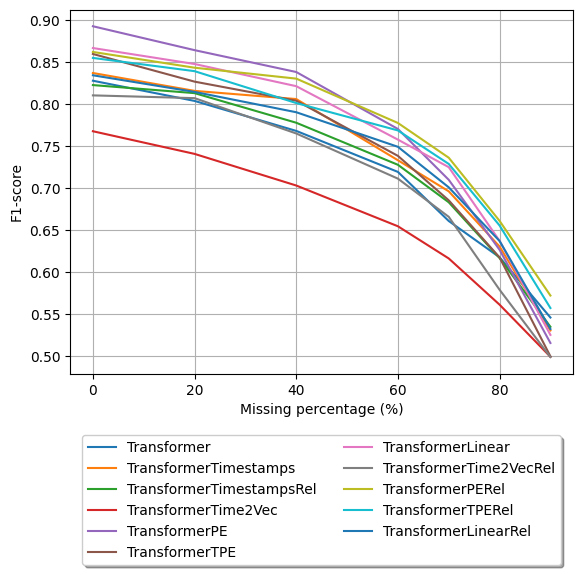

In [38]:
plot_metric(model_mean, metric="F1-score", save_name="transformer_results")

In [39]:
test = []
for pmiss, metrics in pmiss_result.items():
    res = friedmanchisquare(*[metrics[model] for model in models])
    test.append({"pmiss": pmiss, "chi-statistic": round(res.statistic, 4), "p-value": round(res.pvalue, 4)})
test = pd.DataFrame(test)
test

,pmiss,chi-statistic,p-value
0,0,37.0975,0.0001
1,20,28.3698,0.0016
2,40,37.2916,0.0001
3,60,24.2207,0.0070
4,70,22.2617,0.0138
5,80,10.8010,0.3732
6,90,14.6923,0.1437
